In [343]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [344]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Bank of America

**Hight, Low, Open, Close and Volume vs Adj Close**

In [345]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,36.147552
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.763645
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.809727
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.755962
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.779007


In [346]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
High         2517 non-null float64
Low          2517 non-null float64
Open         2517 non-null float64
Close        2517 non-null float64
Volume       2517 non-null float64
Adj Close    2517 non-null float64
dtypes: float64(6)
memory usage: 137.6 KB


In [347]:
BAC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,22.475407,21.894899,22.203417,22.174660,1.334864e+08,19.100870
std,15.403290,15.198863,15.304860,15.304887,1.279111e+08,11.811462
min,3.510000,2.530000,3.220000,3.140000,4.835400e+06,2.865187
25%,12.450000,12.130000,12.310000,12.270000,4.841140e+07,11.288685
50%,15.970000,15.600000,15.780000,15.790000,1.013807e+08,14.676198
75%,33.599998,31.750000,32.730000,32.630001,1.752131e+08,28.697529
max,55.080002,54.820000,55.040001,54.900002,1.226791e+09,43.714695


In [348]:
BAC.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [349]:
BAC.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999286,0.999647,0.999634,-0.570844,0.997676
Low,0.999286,1.000000,0.999625,0.999644,-0.580302,0.997040
Open,0.999647,0.999625,1.000000,0.999378,-0.575307,0.997115
Close,0.999634,0.999644,0.999378,1.000000,-0.575507,0.997739
Volume,-0.570844,-0.580302,-0.575307,-0.575507,1.000000,-0.589735
Adj Close,0.997676,0.997040,0.997115,0.997739,-0.589735,1.000000


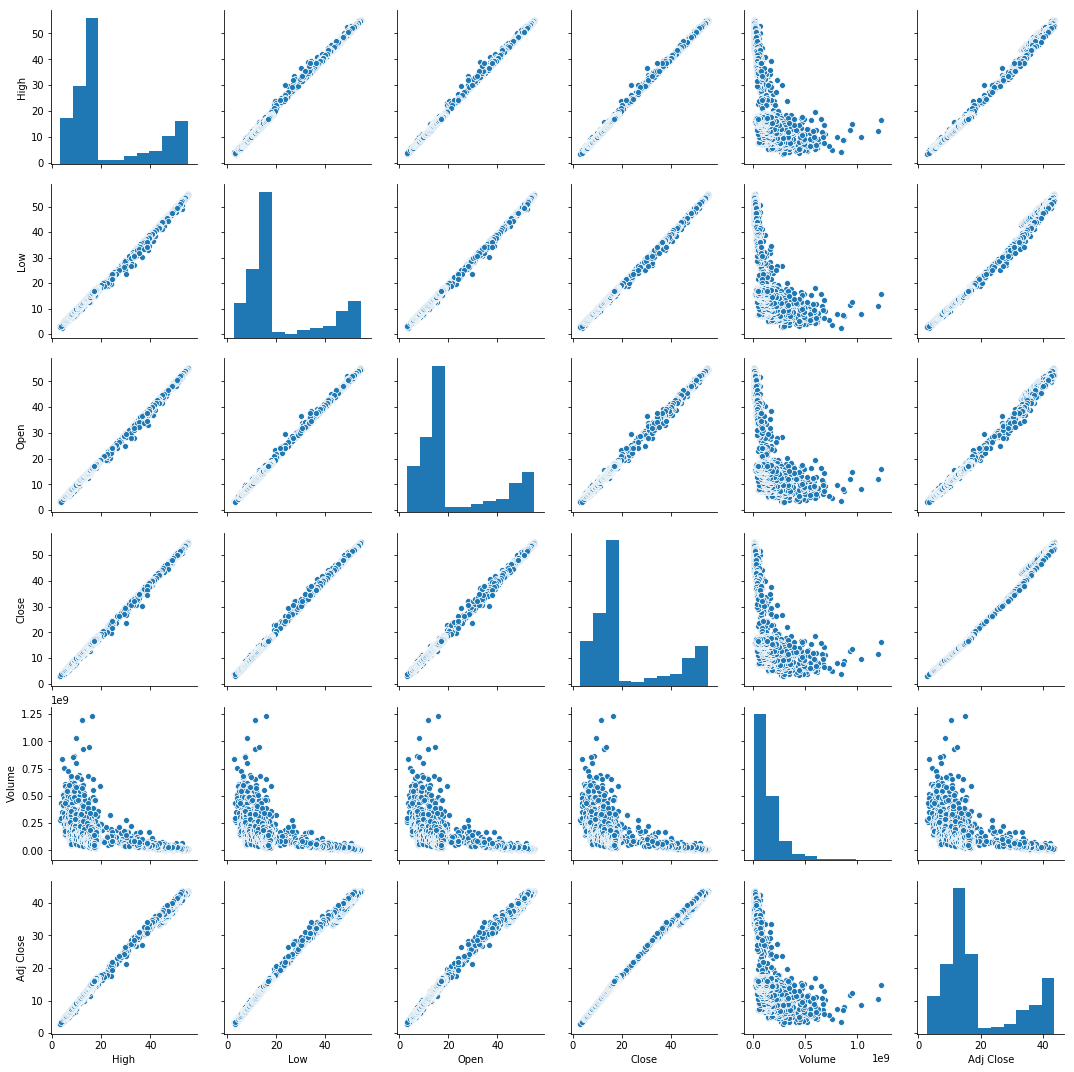

In [350]:
sns.pairplot(BAC)

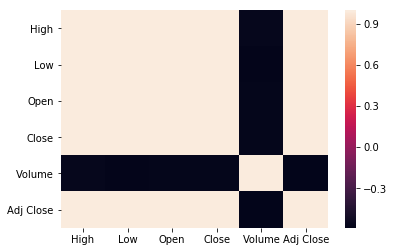

In [353]:
sns.heatmap(BAC.corr())

In [354]:
X = BAC[['High', 'Low', 'Open', 'Close', 'Volume']]
X.head()

,High,Low,Open,Close,Volume
Date,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0


In [355]:
Y = BAC['Adj Close']
Y.head()

Date
2006-01-03    36.147552
2006-01-04    35.763645
2006-01-05    35.809727
2006-01-06    35.755962
2006-01-09    35.779007
Name: Adj Close, dtype: float64

In [356]:
from sklearn.model_selection import train_test_split

In [358]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [359]:
from sklearn.linear_model import LinearRegression

In [360]:
lm = LinearRegression()

In [361]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [362]:
print(lm.intercept_)

2.6775829859340057


In [363]:
print(lm.coef_)

[ 4.40027245e-01 -6.39465821e-01  1.44121039e-02  9.32834712e-01
 -3.34589941e-09]


In [364]:
coefs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])

In [365]:
coefs

,Coefs
High,4.400272e-01
Low,-6.394658e-01
Open,1.441210e-02
Close,9.328347e-01
Volume,-3.345899e-09


In [366]:
predict = lm.predict(X_test)

In [367]:
predict

array([ 9.74216457, 10.20378182, 12.53518413, ..., 43.4301637 ,
       11.90443892, 40.32098412])

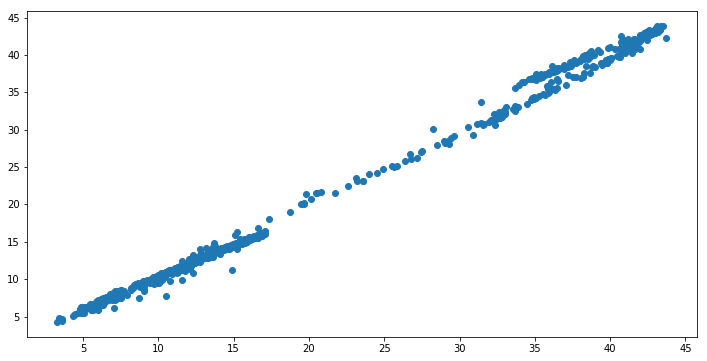

In [369]:
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, predict)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


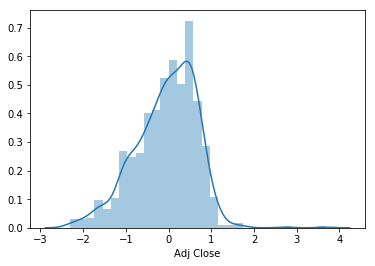

In [370]:
sns.distplot((Y_test-predict))

In [371]:
from sklearn import metrics

In [372]:
print('MAE', metrics.mean_absolute_error(Y_test, predict))

MAE 0.5647735633986961


In [373]:
print('MSE', metrics.mean_squared_error(Y_test, predict))

MSE 0.5126603865773467


In [374]:
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

RMSE 0.7160030632457843


# CitiGroup

**Hight, Low, Open, Close and Volume vs Adj Close**

In [375]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,458.047638
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,449.590973
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,451.821289
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,451.821289
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,449.683960


In [376]:
C.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
High         2517 non-null float64
Low          2517 non-null float64
Open         2517 non-null float64
Close        2517 non-null float64
Volume       2517 non-null float64
Adj Close    2517 non-null float64
dtypes: float64(6)
memory usage: 137.6 KB


In [377]:
C.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,147.422630,143.622424,145.685157,145.388713,2.842885e+07,136.131466
std,178.963279,175.978481,177.553275,177.398413,2.829912e+07,165.382898
min,10.700000,9.700000,10.200000,10.200000,6.328000e+05,9.613211
25%,40.099998,38.799999,39.500000,39.400002,1.007370e+07,37.133381
50%,49.919998,48.889999,49.430000,49.389999,2.183960e+07,46.652332
75%,204.600006,190.399994,197.399994,196.899994,3.869110e+07,184.983383
max,570.000000,555.500000,566.000000,564.099976,3.772638e+08,526.351074


In [378]:
C.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

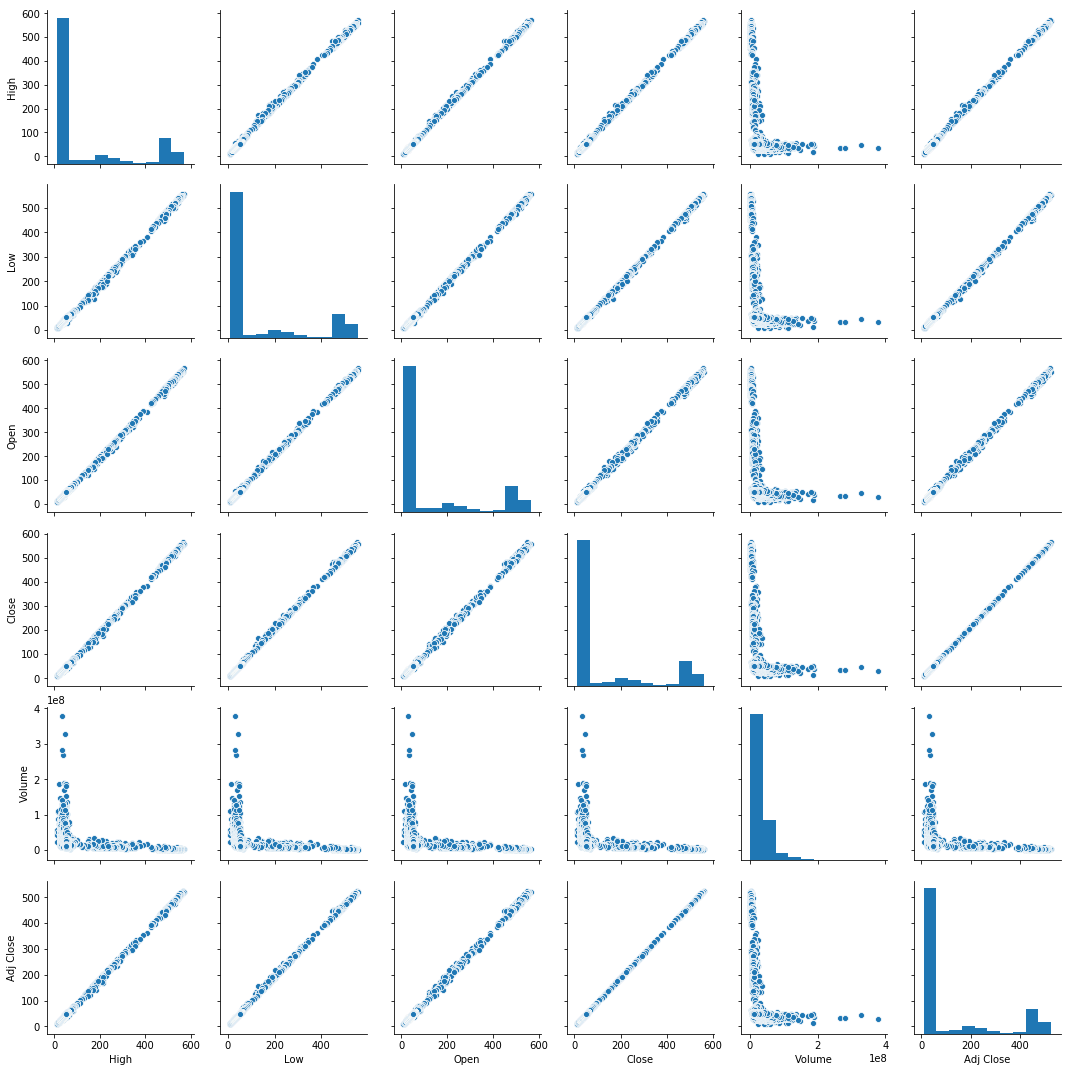

In [379]:
sns.pairplot(C)

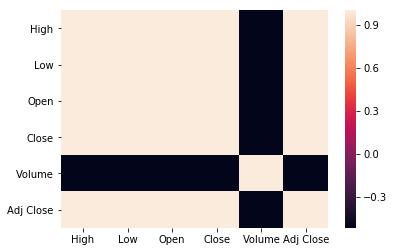

In [380]:
sns.heatmap(C.corr())

In [381]:
X2 = BAC[['High', 'Low', 'Open', 'Close', 'Volume']]
X2.head()

,High,Low,Open,Close,Volume
Date,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0


In [382]:
Y2 = C['Adj Close']
Y2.head()

Date
2006-01-03    458.047638
2006-01-04    449.590973
2006-01-05    451.821289
2006-01-06    451.821289
2006-01-09    449.683960
Name: Adj Close, dtype: float64

In [383]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.4, random_state=101)

In [384]:
lm2 = LinearRegression()

In [385]:
lm2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [386]:
print(lm2.intercept_)

-124.12108845911112


In [387]:
print(lm2.coef_)

[-2.56803112e+01  2.59589774e+01  5.96845947e+00  5.29540018e+00
  1.40110822e-07]


In [388]:
coefs2 = pd.DataFrame(lm2.coef_, X2.columns, columns=['Coefs2'])

In [389]:
coefs2

,Coefs2
High,-2.568031e+01
Low,2.595898e+01
Open,5.968459e+00
Close,5.295400e+00
Volume,1.401108e-07


In [390]:
predict2 = lm2.predict(X2_test)

In [391]:
predict2

array([ 54.01483117,  19.0112181 ,  33.8894274 , ..., 493.21785334,
        31.57936689, 443.33817091])

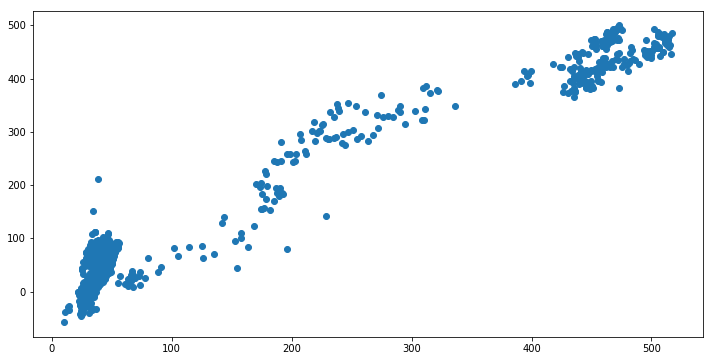

In [392]:
plt.figure(figsize=(12, 6))
plt.scatter(Y2_test, predict2)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


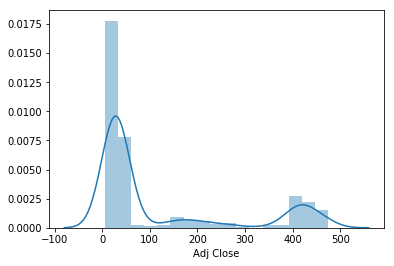

In [393]:
sns.distplot(Y2_test-predict)

In [424]:
print('MAE', metrics.mean_absolute_error(Y2_test, predict2))

MAE 29.574035759430966


In [425]:
print('MSE', metrics.mean_squared_error(Y2_test, predict2))

MSE 1315.378081560469


In [426]:
print('RMSE', np.sqrt(metrics.mean_squared_error(Y2_test, predict2)))

RMSE 36.26814141309793


# JP Morgan
**Hight, Low, Open, Close and Volume vs Adj Close**

In [397]:
JPM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,28.635843
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,28.470566
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,28.556803
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,28.758003
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,29.225082


In [398]:
JPM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
High         2517 non-null float64
Low          2517 non-null float64
Open         2517 non-null float64
Close        2517 non-null float64
Volume       2517 non-null float64
Adj Close    2517 non-null float64
dtypes: float64(6)
memory usage: 137.6 KB


In [399]:
JPM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000
mean,46.539730,45.405276,45.983457,45.985546,3.081195e+07,37.770097
std,9.722836,9.949135,9.838870,9.839554,2.417083e+07,10.130259
min,17.290001,14.960000,15.370000,15.900000,2.926400e+06,12.642586
25%,40.270000,39.119999,39.669998,39.709999,1.450760e+07,30.963648
50%,45.090000,44.000000,44.540001,44.590000,2.410490e+07,34.783005
75%,52.919998,52.099998,52.570000,52.540001,3.825030e+07,45.023273
max,70.610001,69.459999,70.190002,70.080002,2.172942e+08,63.710121


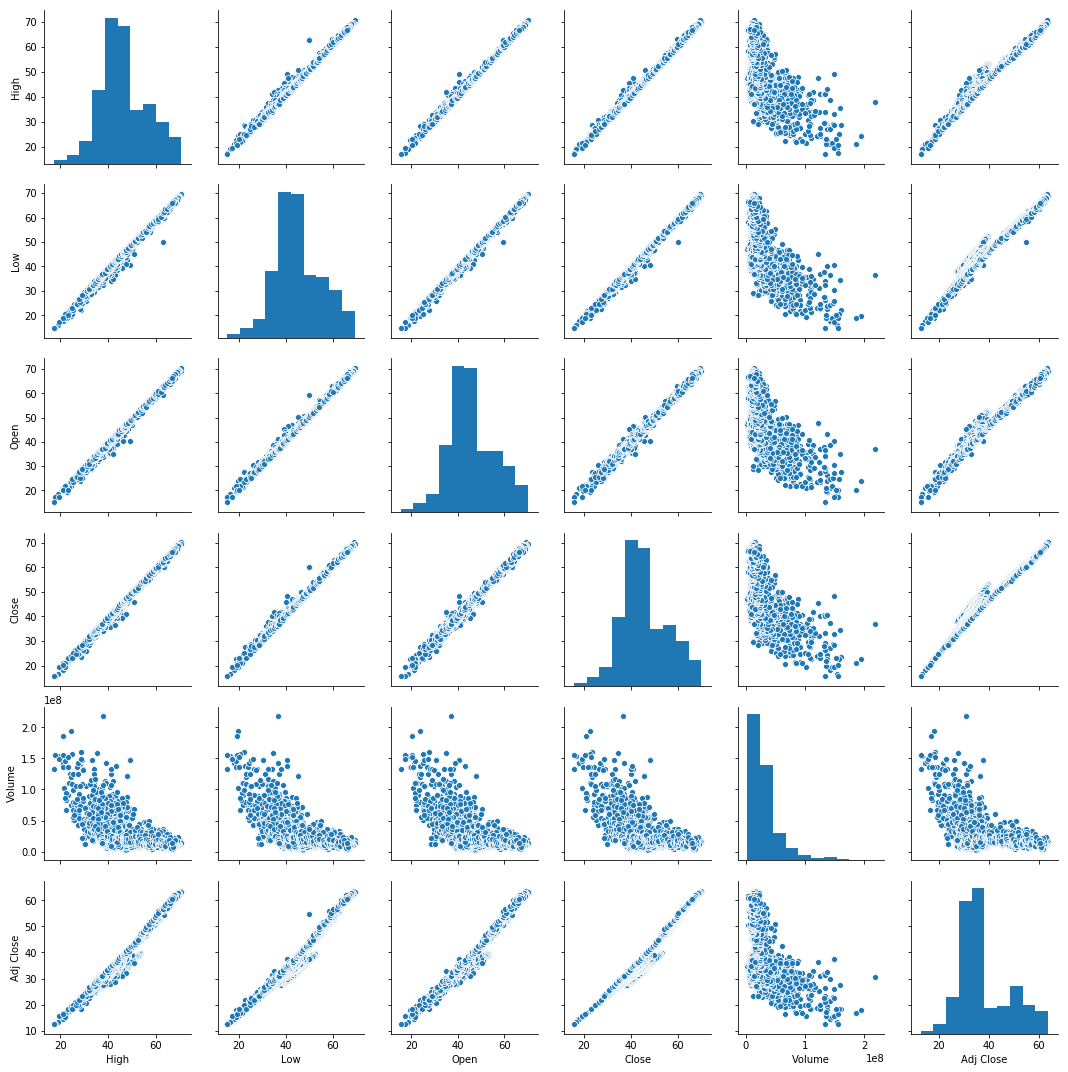

In [400]:
sns.pairplot(JPM)

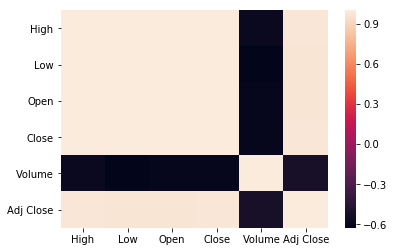

In [401]:
sns.heatmap(JPM.corr())

In [404]:
X3 = JPM[['High', 'Low', 'Open', 'Close', 'Volume']]
X3.head()

,High,Low,Open,Close,Volume
Date,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0


In [406]:
Y3 = JPM['Adj Close']
Y3.head()

Date
2006-01-03    28.635843
2006-01-04    28.470566
2006-01-05    28.556803
2006-01-06    28.758003
2006-01-09    29.225082
Name: Adj Close, dtype: float64

In [409]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=101)

In [410]:
lm3 = LinearRegression()

In [411]:
lm3.fit(X3_train, Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [413]:
print(lm3.intercept_)

-13.029991492221392


In [414]:
print(lm3.coef_)

[-5.72957520e-01  5.62128715e-01  1.63170077e-01  9.28543309e-01
  5.73437428e-08]


In [415]:
coefs3 = pd.DataFrame(lm3.coef_, X3.columns, columns=['Coefs3'])

In [416]:
coefs3

,Coefs3
High,-5.729575e-01
Low,5.621287e-01
Open,1.631701e-01
Close,9.285433e-01
Volume,5.734374e-08


In [417]:
predict3 = lm3.predict(X3_test)

In [418]:
predict3

array([26.0414437 , 32.70325367, 33.23932699, 50.87675694, 35.62500705,
       49.46217335, 27.95169686, 37.70133265, 32.56062922, 53.39569766,
       28.77422243, 28.40411046, 51.12203163, 20.12351944, 38.90245004,
       36.89420365, 58.76107118, 44.74438481, 30.41412376, 52.30894937,
       56.59166171, 44.26006786, 52.32305415, 41.98209148, 36.41770665,
       26.56509002, 34.43044419, 28.00707508, 39.21193986, 38.54621816,
       40.29738052, 32.95236988, 38.7489415 , 37.79945223, 35.87764081,
       44.57521775, 32.58371446, 33.44722294, 38.65081263, 48.71088302,
       51.62424075, 32.45664333, 35.18215223, 27.71735621, 34.2300166 ,
       33.36557524, 36.18700164, 42.20148747, 39.0881283 , 40.606721  ,
       49.84773338, 32.57502774, 62.13562141, 33.10006873, 44.12497699,
       43.74351447, 37.21829472, 43.82023761, 39.63835232, 22.57302382,
       32.43902913, 40.8465665 , 37.1050173 , 37.54713081, 35.82601971,
       49.64710451, 32.55530422, 25.11821093, 30.7598171 , 32.96

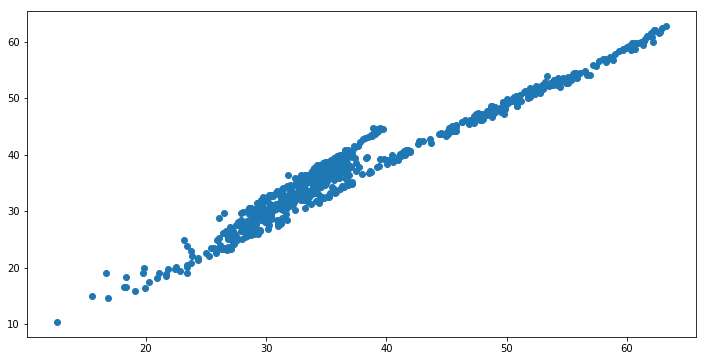

In [419]:
plt.figure(figsize=(12, 6))
plt.scatter(Y3_test, predict3)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


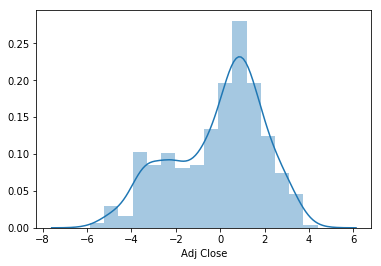

In [421]:
sns.distplot(Y3_test-predict3)

In [423]:
print('MAE', metrics.mean_absolute_error(Y3_test, predict3))

MAE 1.6745011833491885


In [427]:
print('MSE', metrics.mean_squared_error(Y3_test, predict3))

MSE 4.182272785824963


In [428]:
print('RMSE', np.sqrt(metrics.mean_squared_error(Y3_test, predict3)))

RMSE 2.0450605824339196
